# SIR Model

## Using System Dynamics to create SIR Models

This notebook demonstrates different scenarios of SARS-CoV-2 in Germany. It shows what will happen if no measures are taken to reduce the spreading of the virus and also what will happen under certain measures.

__Assumptions:__

- Contact Rate: 20 persons
- Infectivity: 2%
- Intensive Care Needed: 0.2%
- Intensive Care Available: 30,000 units

_Contact rate_ describes how many people a person encounters per day in average.

_Infectivity_ is the probability that a person becomes infected after contact with an infectious person.

_Intensive Care Needed_ measures the number of infected people who need intensive care.

_Intensive Care Available_ is the number of intensive care units available.

__Goal:__

The goal of this simulation is to keep the number of intensive care units needed below the number of intensive care units available. With this goal we can avoid a burden on the health care system.

In [1]:
from BPTK_Py.bptk import bptk 
import pandas as pd

bptk = bptk()

In [2]:
%run src/dashboard/sir_dashboard.ipy

## Base scenario

The base case describes the numbers in Germany and demonstrates what will happen if no measures are taken.

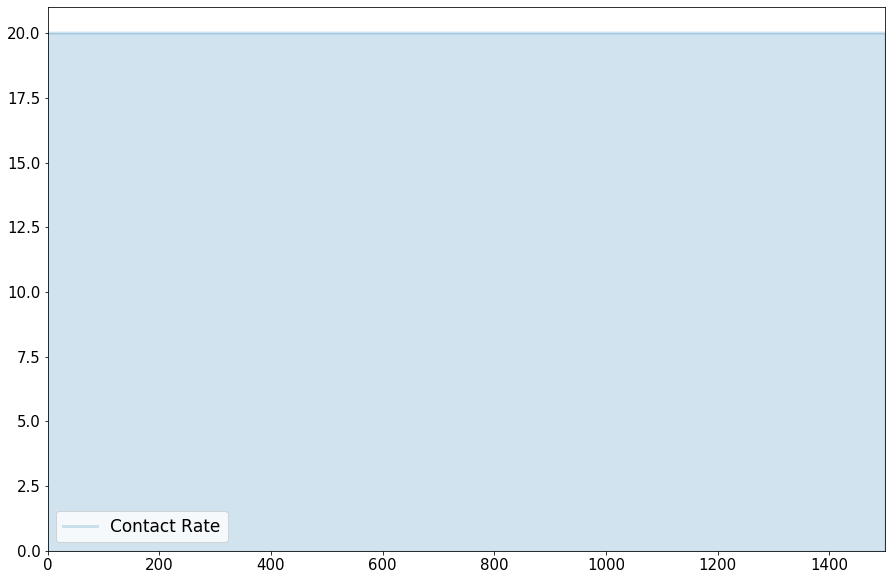

In [13]:
model_base=bptk.scenario_manager_factory.scenario_managers['smAdvancedRealistic'].scenarios['contactLargeGroups'].model
ax = pd.DataFrame([model_base.equations["contactRateC"](t) for t in range(model_base.starttime,model_base.stoptime+1)]).plot(kind="area",alpha=0.2,figsize=(15,10))
ax.legend(["Contact Rate"])

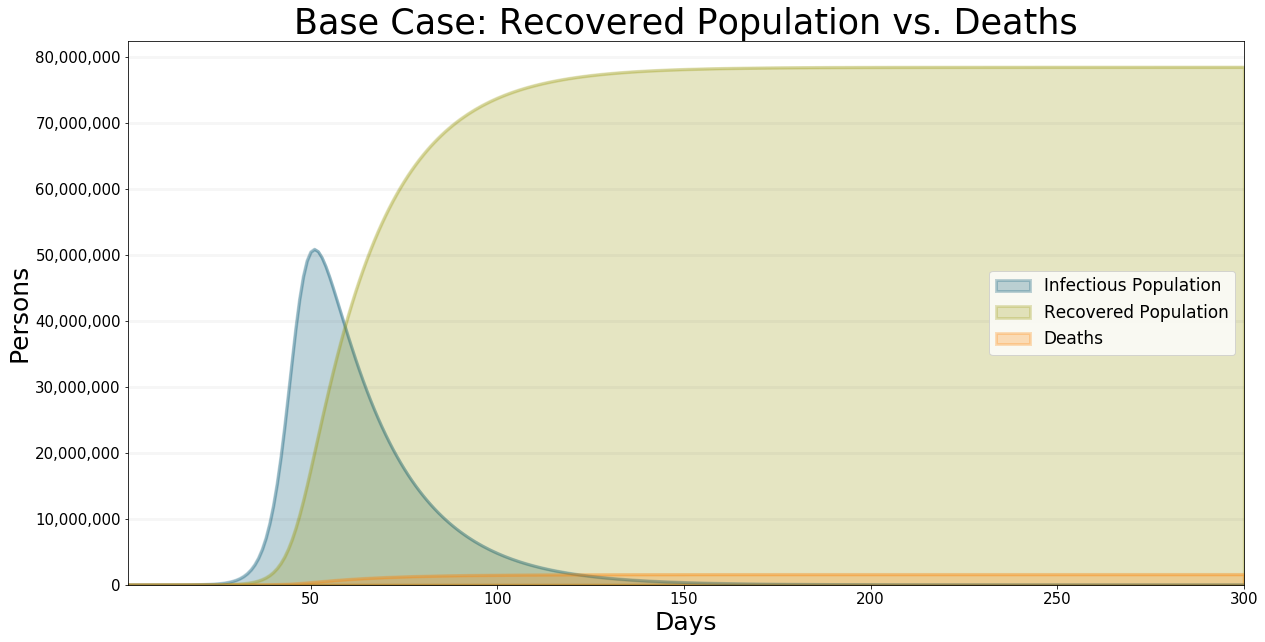

In [9]:
bptk.plot_scenarios(
    scenario_managers=["smAdvancedRealistic"],
    scenarios=["base"],
    title="Base Case: Recovered Population vs. Deaths",
    x_label="Days",
    y_label="Persons",
    equations=["infectiousPopulationI","recoveredPopulationR","deathsD"],
    series_names={
        "smAdvancedRealistic_base_infectiousPopulationI" : "Infectious Population",
        "smAdvancedRealistic_base_recoveredPopulationR" : "Recovered Population",
        "smAdvancedRealistic_base_deathsD": "Deaths"
    },
    visualize_to_period=300
)

Without any measures the numbers lead to explosive exponential growth as shown in the graph above. The graph below demonstrates the already existing exponential growth in the first 25 days.

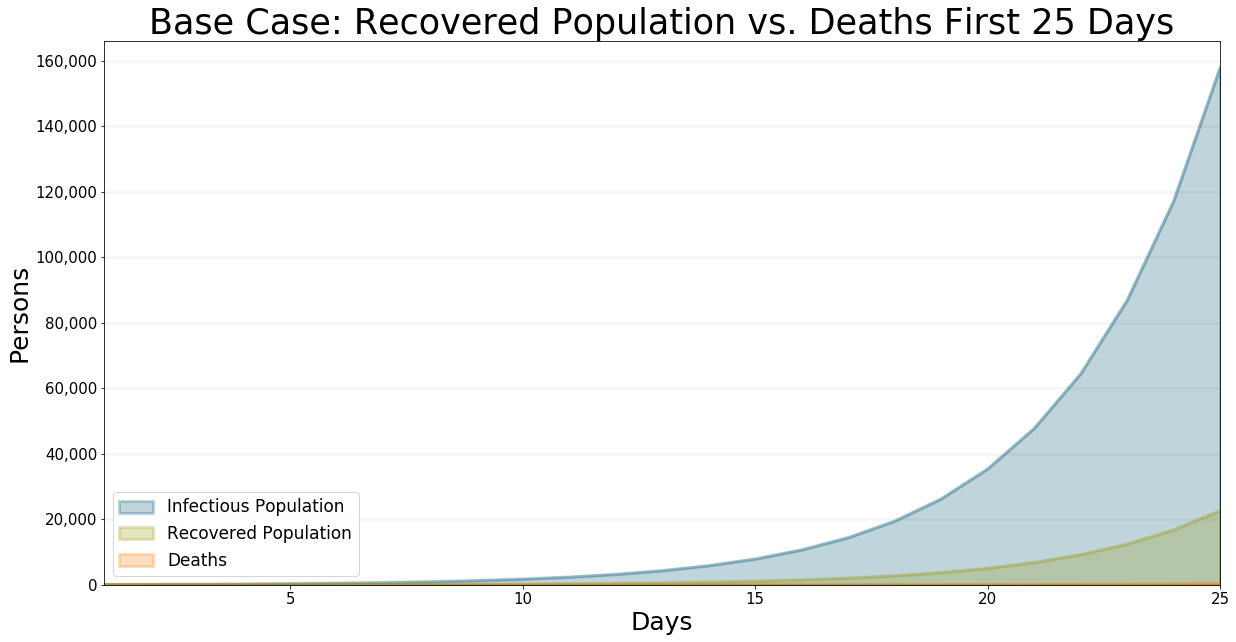

In [10]:
bptk.plot_scenarios(
    scenario_managers=["smAdvancedRealistic"],
    scenarios=["base"],
    title="Base Case: Recovered Population vs. Deaths First 25 Days",
    x_label="Days",
    y_label="Persons",
    equations=["infectiousPopulationI","recoveredPopulationR","deathsD"],
    series_names={
        "smAdvancedRealistic_base_infectiousPopulationI" : "Infectious Population",
        "smAdvancedRealistic_base_recoveredPopulationR" : "Recovered Population",
        "smAdvancedRealistic_base_deathsD": "Deaths"
    },
    visualize_from_period=0,
    visualize_to_period=25
)

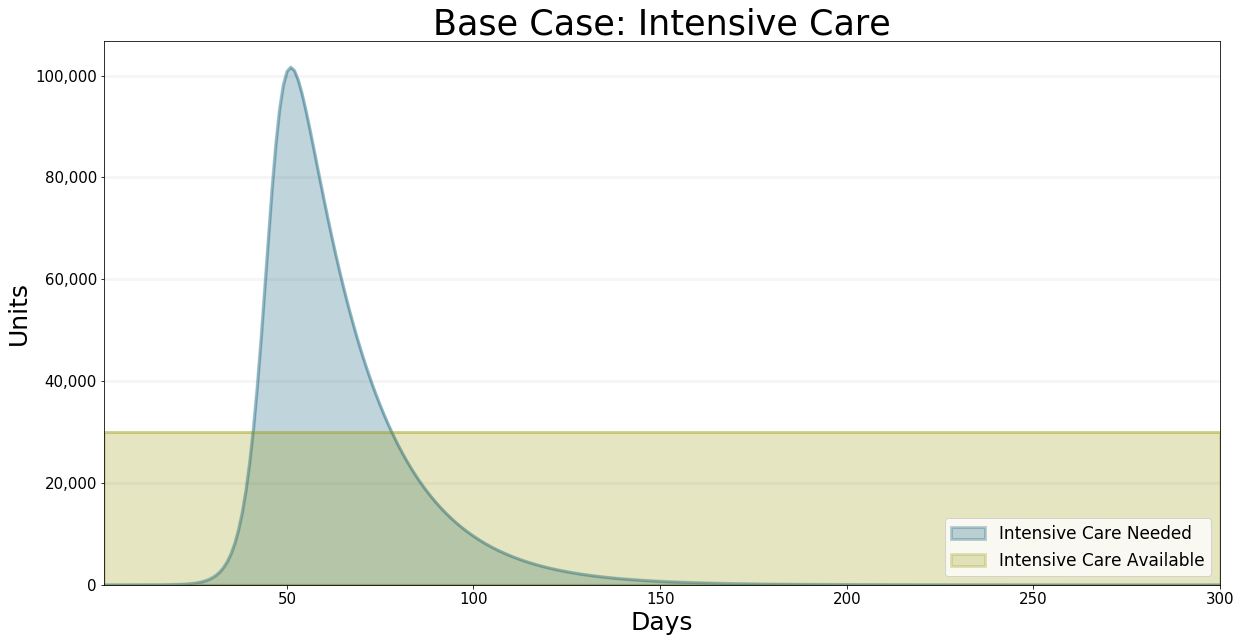

In [11]:
bptk.plot_scenarios(
    scenario_managers=["smAdvancedRealistic"],
    scenarios=["base"],
    title="Base Case: Intensive Care",
    x_label="Days",
    y_label="Units",
    equations=["intensiveCareUnitsNeeded","intensiveCareUnitsAvailable"],
    series_names={
        "smAdvancedRealistic_base_intensiveCareUnitsNeeded" : "Intensive Care Needed",
        "smAdvancedRealistic_base_intensiveCareUnitsAvailable" : "Intensive Care Available"  
    },
    visualize_to_period=300
)

There are not enough intensive care units available for all the people who need intensive care. This scenario may lead to more deaths and a collapse of the health care system.

## Reducing Spreading of the Virus

The following scenarios show the effect of taking measures. It shows which measures are necessary to avoid the collapse of the health care system.

### Less contact to other people over time

We can avoid the spreading of the virus by reducing the contact to other people. In other words, we need to reduce the contact rate. Therefore less people can be infected.

In [3]:
from BPTK_Py.sdcompiler.sdmodel import LERP
contact_rate = int(bptk.scenario_manager_factory.scenario_managers['smAdvancedRealistic'].scenarios['base'].model.equations['contactRateC'](0))

#### Reducing the contact rate slowly

The first scenario shows what will happen if Germany takes measures very slowly. The idea is to reduce the contact rate every 40 days by two people until we reach a contact rate of two. We then increase the contact rate after almost two years. 

In [18]:
model_large_groups = bptk.scenario_manager_factory.scenario_managers['smAdvancedRealistic'].scenarios['contactLargeGroups'].model
stoptime_large_groups = model_large_groups.stoptime

points_list_large = []
contact_large = contact_rate
for t in range(stoptime_large_groups):
    if t%40==0 and t!=0 and t < 365:
        contact_large = contact_large - 2
    if t == 600:
        contact_large = 6
    if t == 700:
        contact_large = 10
    if t == 800:
        contact_large = 14
    if t == 900:
        contact_large = 20
    points_list_large.append((t,contact_large))


model_large_groups.points["contactPointsLarge"] = points_list_large
model_large_groups.equations["contactRateC"] = lambda t: LERP(t,model_large_groups.points["contactPointsLarge"])

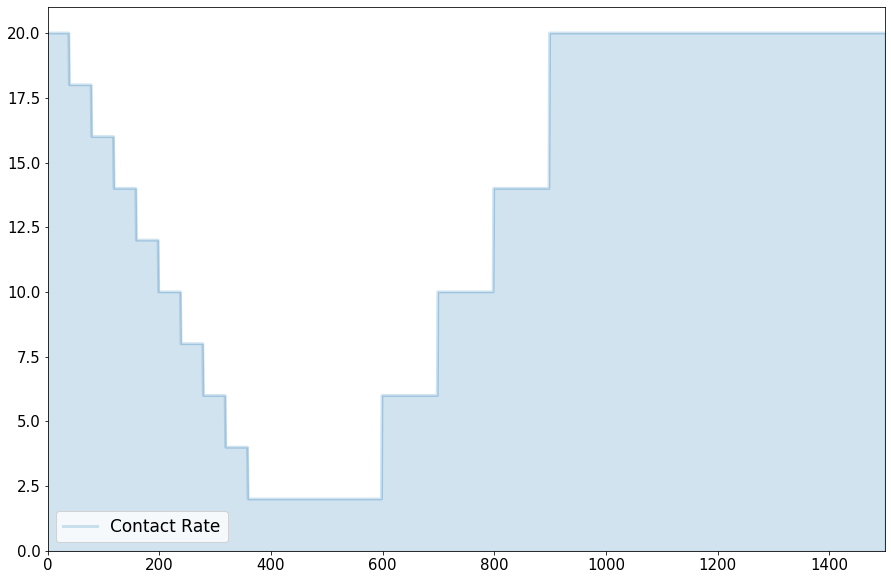

In [19]:
ax = pd.DataFrame([model_large_groups.equations["contactRateC"](t) for t in range(model_large_groups.starttime,model_large_groups.stoptime+1)]).plot(kind="area",alpha=0.2,figsize=(15,10))
ax.legend(["Contact Rate"])

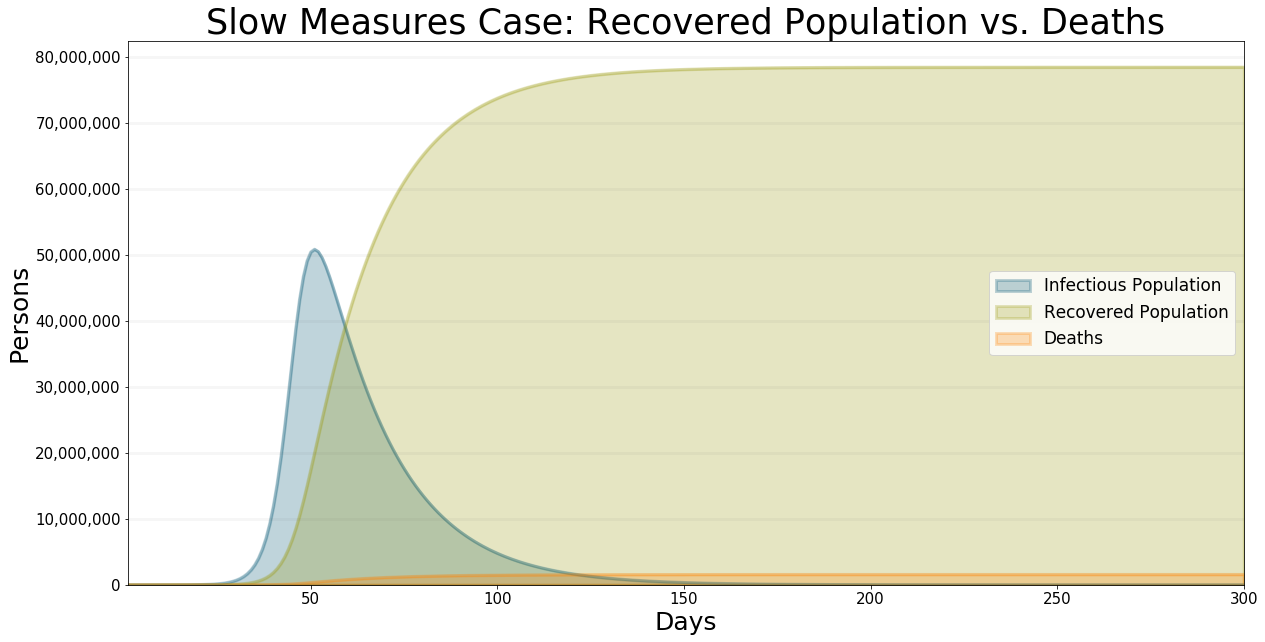

In [13]:
bptk.plot_scenarios(
    scenario_managers=["smAdvancedRealistic"],
    scenarios=["contactLargeGroups"],
    title="Slow Measures Case: Recovered Population vs. Deaths",
    x_label="Days",
    y_label="Persons",
    equations=["infectiousPopulationI","recoveredPopulationR","deathsD"],
    series_names={
        "smAdvancedRealistic_contactLargeGroups_infectiousPopulationI" : "Infectious Population",
        "smAdvancedRealistic_contactLargeGroups_recoveredPopulationR" : "Recovered Population",
        "smAdvancedRealistic_contactLargeGroups_deathsD": "Deaths"
    },
    visualize_to_period=300
)

As you can see from the graph above, the number of the infectious population is still growing exponentially. Comparing the base scenario with this current scenario, we can see that there is no siginificant difference. Taking measures very slowly won't stop the spreading of the virus.

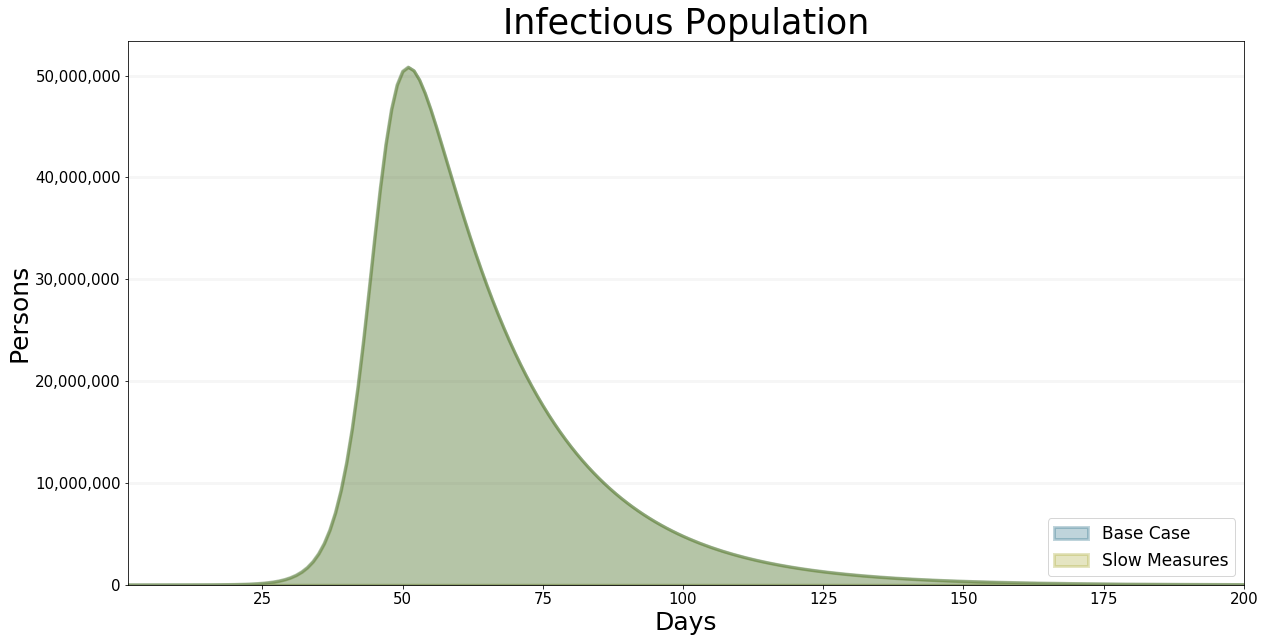

In [9]:
bptk.plot_scenarios(
    scenario_managers=["smAdvancedRealistic"],
    scenarios=["contactLargeGroups","base"],
    title="Infectious Population",
    x_label="Days",
    y_label="Persons",
    equations=["infectiousPopulationI"],
    series_names={
        "smAdvancedRealistic_base_infectiousPopulationI" : "Base Case",
        "smAdvancedRealistic_contactLargeGroups_infectiousPopulationI" : "Slow Measures"
    },
    visualize_to_period=200
    
)

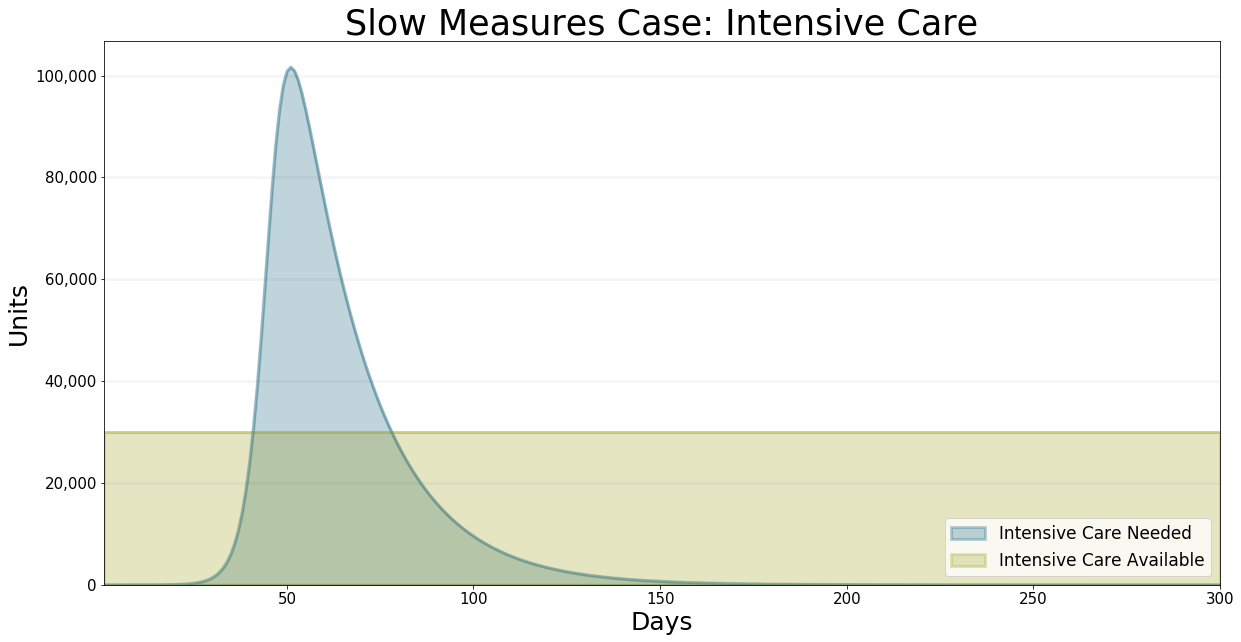

In [14]:
bptk.plot_scenarios(
    scenario_managers=["smAdvancedRealistic"],
    scenarios=["contactLargeGroups"],
    title="Slow Measures Case: Intensive Care",
    x_label="Days",
    y_label="Units",
    equations=["intensiveCareUnitsNeeded","intensiveCareUnitsAvailable"],
    series_names={
        "smAdvancedRealistic_contactLargeGroups_intensiveCareUnitsNeeded" : "Intensive Care Needed",
        "smAdvancedRealistic_contactLargeGroups_intensiveCareUnitsAvailable" : "Intensive Care Available" 
    },
    visualize_to_period=300
)

Enough available intensive care units are not given for this scenario.

#### Reducing the contact rate from large groups to small groups

In [14]:
model_small_groups = bptk.scenario_manager_factory.scenario_managers['smAdvancedRealistic'].scenarios['contactSmallGroups'].model
stoptime_small_groups = model_small_groups.stoptime

points_list_small = []
contact_small = contact_rate
for t in range(stoptime_small_groups):
    if t==25:
        contact_small= 10
    if t==41:
        contact_small = 5
    if t==500:
        contact_small = 10
    if t==1200:
        contact_small = 20
    points_list_small.append((t,contact_small))


model_small_groups.points["contactPointsSmall"] = points_list_small
model_small_groups.equations["contactRateC"] = lambda t: LERP(t,model_small_groups.points["contactPointsSmall"])

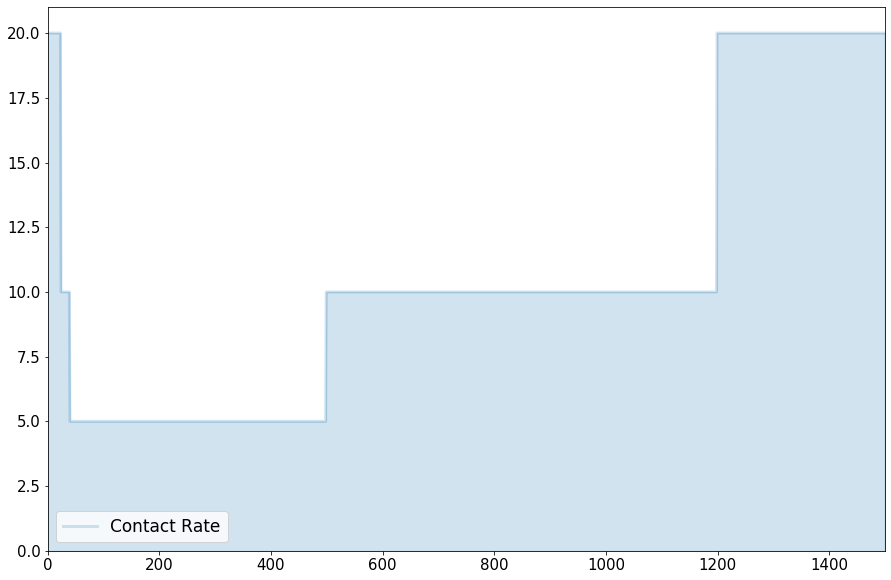

In [15]:
ax = pd.DataFrame([model_small_groups.equations["contactRateC"](t) for t in range(model_small_groups.starttime,model_small_groups.stoptime+1)]).plot(kind="area",alpha=0.2,figsize=(15,10))
ax.legend(["Contact Rate"])

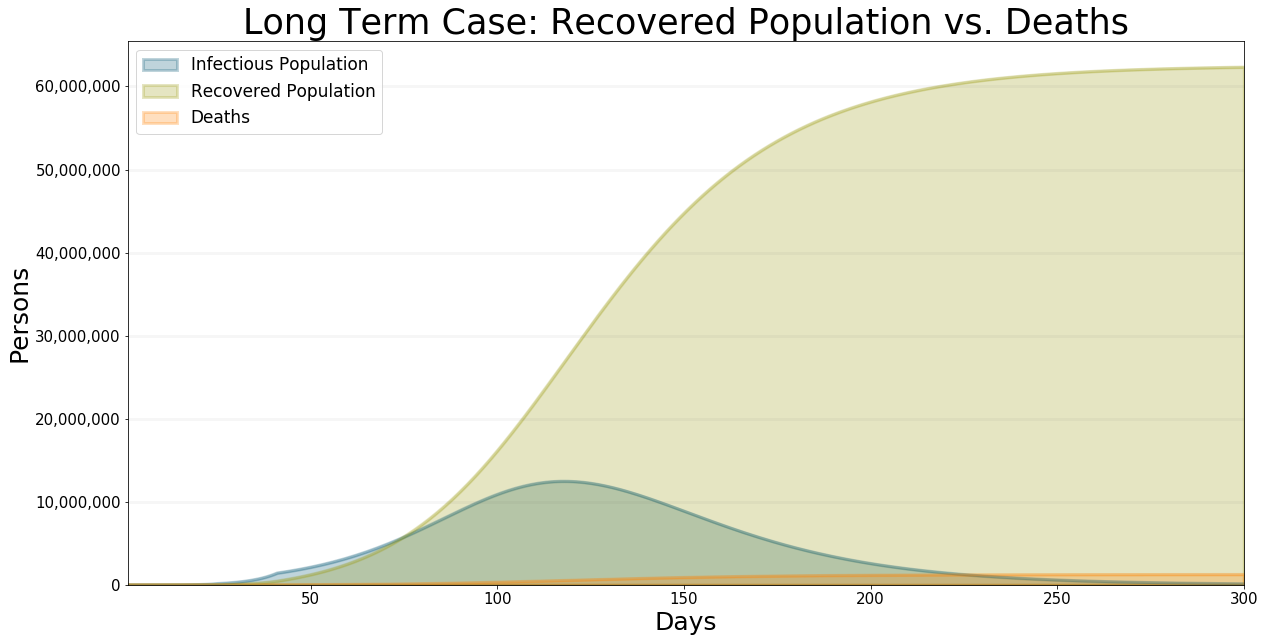

In [6]:
bptk.plot_scenarios(
    scenario_managers=["smAdvancedRealistic"],
    scenarios=["contactSmallGroups"],
    title="Long Term Case: Recovered Population vs. Deaths",
    x_label="Days",
    y_label="Persons",
    equations=["infectiousPopulationI","recoveredPopulationR","deathsD"],
    series_names={
        "smAdvancedRealistic_contactSmallGroups_infectiousPopulationI" : "Infectious Population",
        "smAdvancedRealistic_contactSmallGroups_recoveredPopulationR" : "Recovered Population",
        "smAdvancedRealistic_contactSmallGroups_deathsD": "Deaths"
    },
    visualize_to_period=300
)

The graph shows that the strict measures help to reduce the spreading of the virus. The infectious population does not grow exponentially.

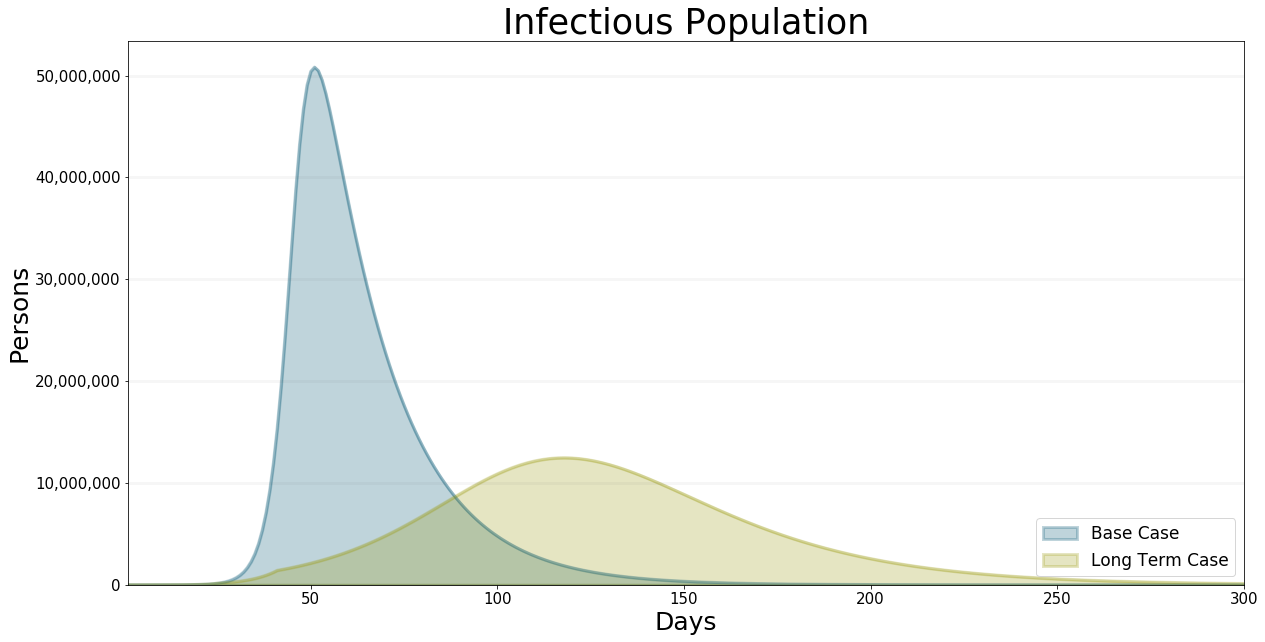

In [11]:
bptk.plot_scenarios(
    scenario_managers=["smAdvancedRealistic"],
    scenarios=["contactSmallGroups","base"],
    title="Infectious Population",
    x_label="Days",
    y_label="Persons",
    equations=["infectiousPopulationI"],
    series_names={
        "smAdvancedRealistic_base_infectiousPopulationI" : "Base Case",
        "smAdvancedRealistic_contactSmallGroups_infectiousPopulationI" : "Long Term Case"
    },
    visualize_to_period=300
    
)

Comparing this scenario with the base scenario we can see how important social distancing is.

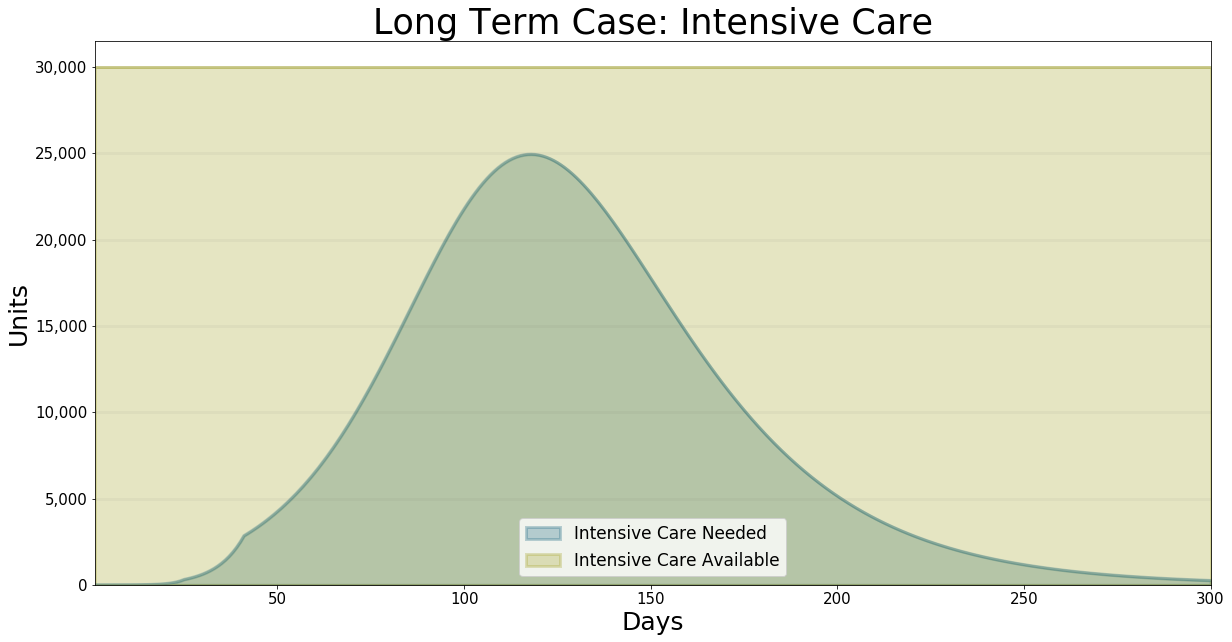

In [12]:
bptk.plot_scenarios(
    scenario_managers=["smAdvancedRealistic"],
    scenarios=["contactSmallGroups"],
    title="Long Term Case: Intensive Care",
    x_label="Days",
    y_label="Units",
    equations=["intensiveCareUnitsNeeded","intensiveCareUnitsAvailable"],
    series_names={
        "smAdvancedRealistic_contactSmallGroups_intensiveCareUnitsNeeded" : "Intensive Care Needed",
        "smAdvancedRealistic_contactSmallGroups_intensiveCareUnitsAvailable" : "Intensive Care Available" 
    },
    visualize_to_period=300
)

For this scenario there are enough intensive care units available. A collapse of the heath care system won't happen.

#### Reducing contact rate from large groups to two people for only a short period of time

This scenario shows if taking measures radically but loosening them only after a short period of time avoid the spreading of the virus. We reduce the contact rate to 2 after ten days and increase the contact rate 90 days later to 20.

In [4]:
model_two_people = bptk.scenario_manager_factory.scenario_managers['smAdvancedRealistic'].scenarios['contactTwoPeople'].model
stoptime_two_people = model_two_people.stoptime

points_list_two = []
contact_two = contact_rate
for t in range(stoptime_two_people):
    if t==10:
        contact_two = 2
    if t==100:
        contact_two = 20
    points_list_two.append((t,contact_two))


model_two_people.points["contactPointsTwo"] = points_list_two
model_two_people.equations["contactRateC"] = lambda t: LERP(t,model_two_people.points["contactPointsTwo"])

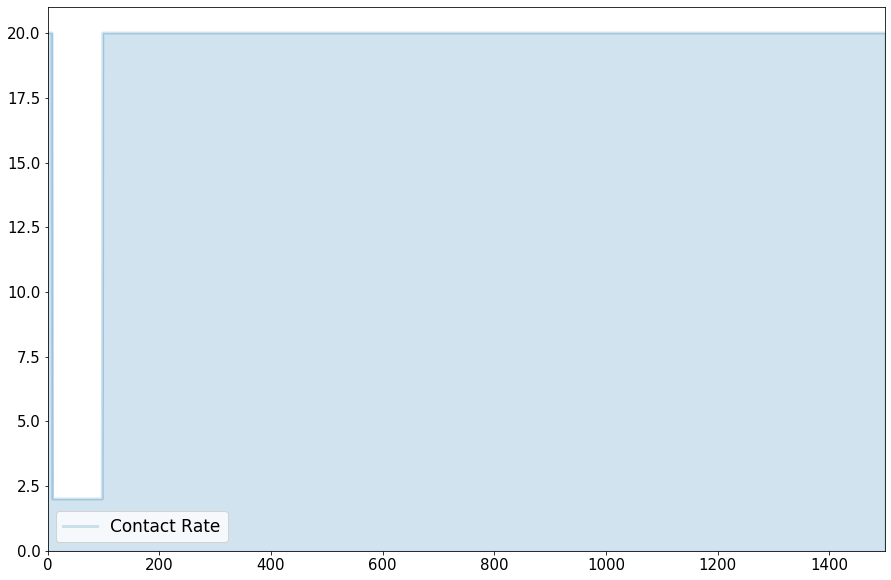

In [5]:
ax = pd.DataFrame([model_two_people.equations["contactRateC"](t) for t in range(model_two_people.starttime,model_two_people.stoptime+1)]).plot(kind="area",alpha=0.2,figsize=(15,10))
ax.legend(["Contact Rate"])

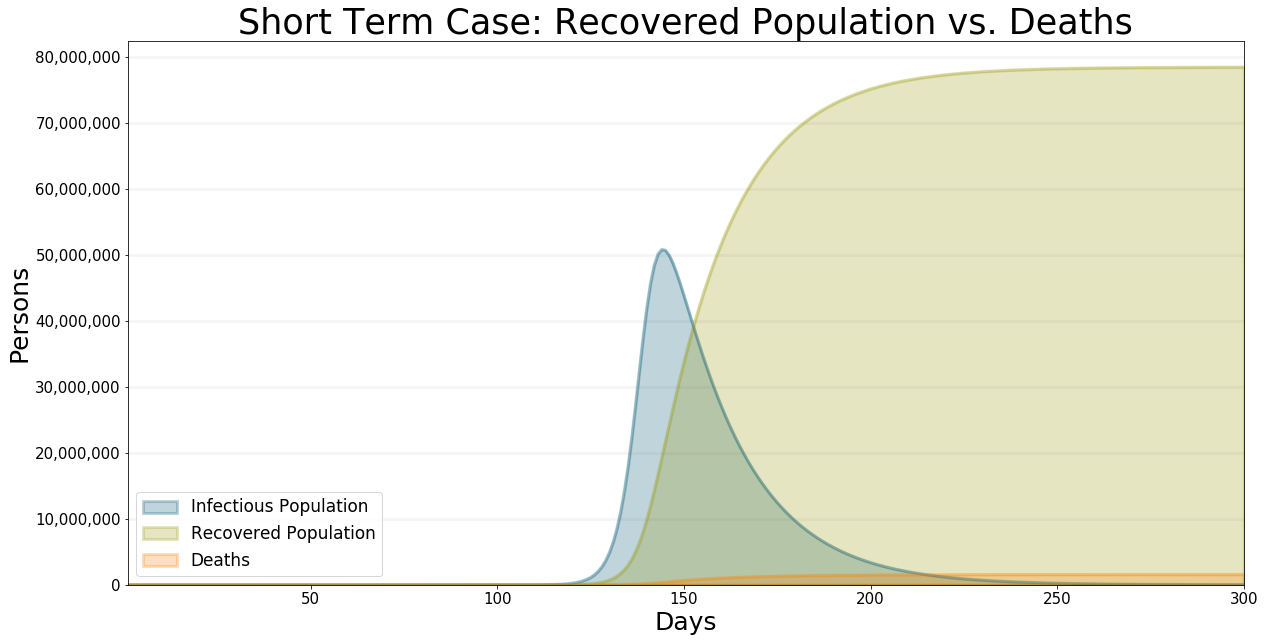

In [6]:
bptk.plot_scenarios(
    scenario_managers=["smAdvancedRealistic"],
    scenarios=["contactTwoPeople"],
    title="Short Term Case: Recovered Population vs. Deaths",
    x_label="Days",
    y_label="Persons",
    equations=["infectiousPopulationI","recoveredPopulationR","deathsD"],
    series_names={
        "smAdvancedRealistic_contactTwoPeople_infectiousPopulationI" : "Infectious Population",
        "smAdvancedRealistic_contactTwoPeople_recoveredPopulationR" : "Recovered Population",
        "smAdvancedRealistic_contactTwoPeople_deathsD": "Deaths"
    },
    visualize_to_period=300
)

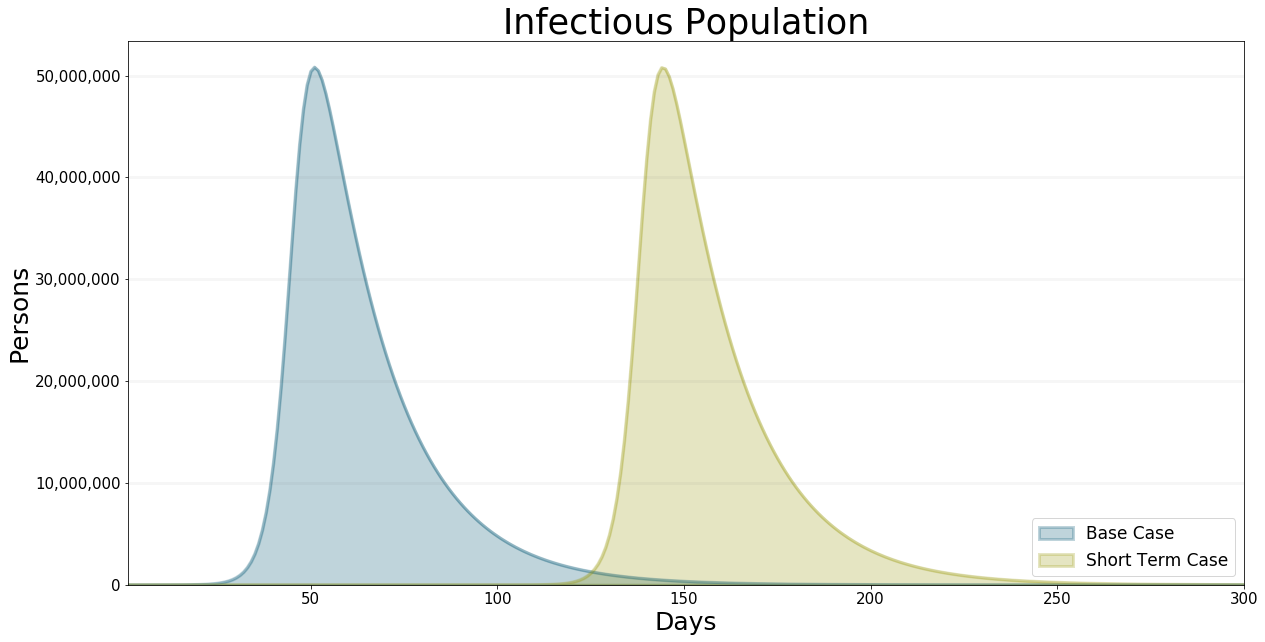

In [7]:
bptk.plot_scenarios(
    scenario_managers=["smAdvancedRealistic"],
    scenarios=["contactTwoPeople","base"],
    title="Infectious Population",
    x_label="Days",
    y_label="Persons",
    equations=["infectiousPopulationI"],
    series_names={
        "smAdvancedRealistic_base_infectiousPopulationI" : "Base Case",
        "smAdvancedRealistic_contactTwoPeople_infectiousPopulationI" : "Short Term Case"
    },
    visualize_to_period=300
    
)

Comparing this scenario with the base scenario shows that the problem is shifted to a later point in time. This means taking measures for only a short period of time won't stem the virus. 

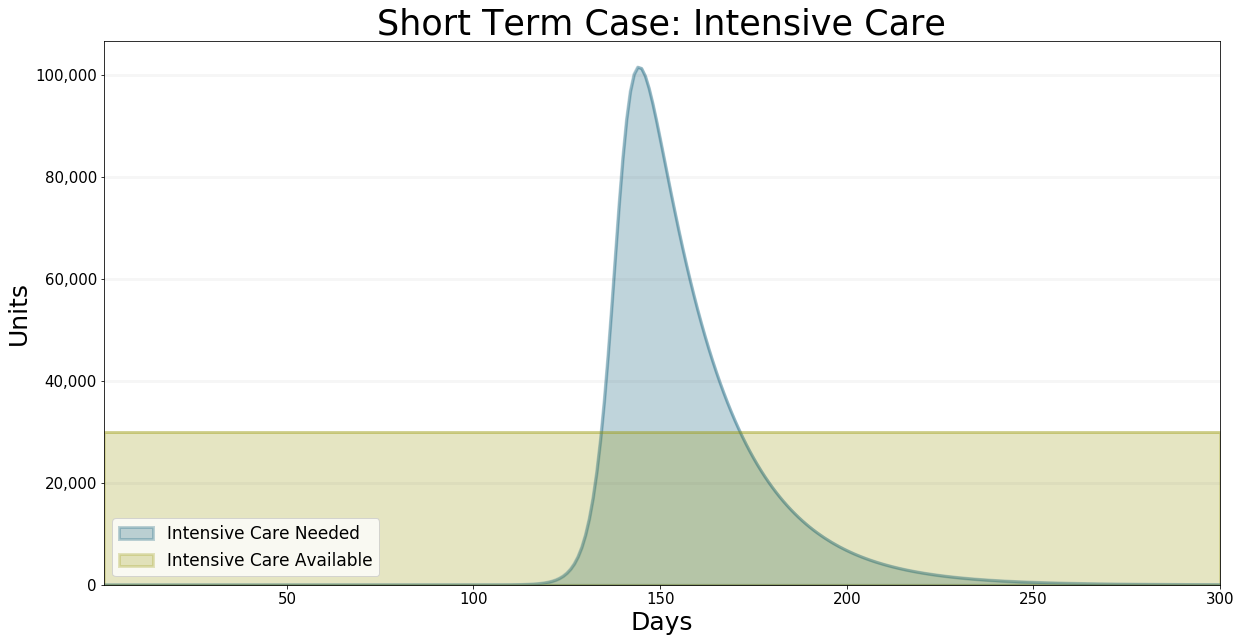

In [8]:
bptk.plot_scenarios(
    scenario_managers=["smAdvancedRealistic"],
    scenarios=["contactTwoPeople"],
    title="Short Term Case: Intensive Care",
    x_label="Days",
    y_label="Units",
    equations=["intensiveCareUnitsNeeded","intensiveCareUnitsAvailable"],
    series_names={
        "smAdvancedRealistic_contactTwoPeople_intensiveCareUnitsNeeded" : "Intensive Care Needed",
        "smAdvancedRealistic_contactTwoPeople_intensiveCareUnitsAvailable" : "Intensive Care Available" 
    },
    visualize_to_period=300
)

As expected, there are not enough intensive care units but only at a later point of time.